In [79]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# 2.1.3 rand vs pseudo-rand

## Linear congruential generator

$$ x_{n+1} = ax_n + b \ (mod \ M) $$

- Mersenne twister (random)
- PCG64 (numpy)

# 2.2.1

Estimate π/4. Count number of Uniform random pairs (x,y) in a quarter of unit circle.

$$ x^2+y^2 < 1 $$

In [3]:
np.pi/4

0.7853981633974483

In [51]:
N = 100_000
x = np.random.rand(N)
y = np.random.rand(N)
in_circle = (x**2 + y**2) < 1.0
in_circle.sum() / N * 4

3.13736

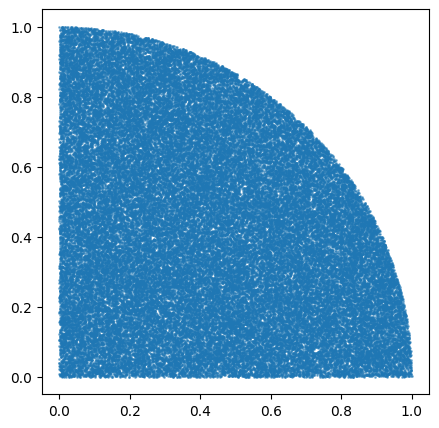

In [54]:
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
ax.scatter(x[in_circle], y[in_circle], s=1, alpha=0.5)

# Fig 2.5

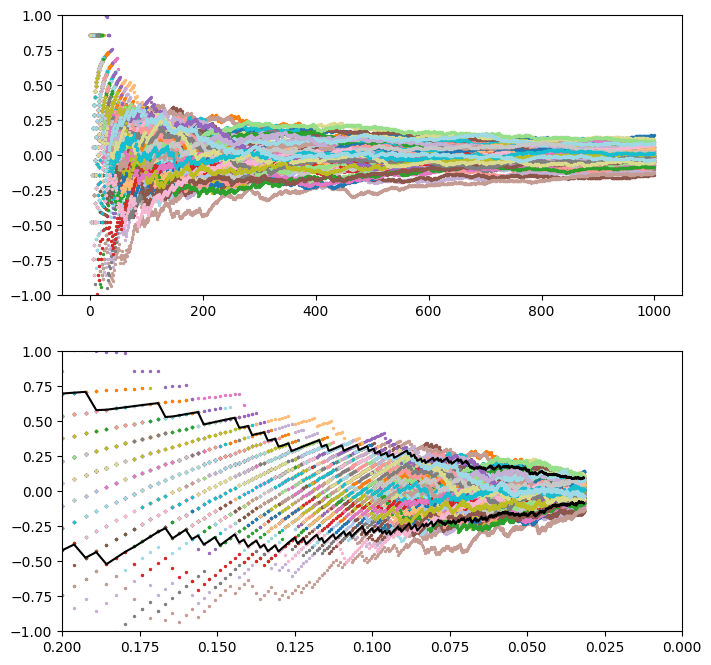

In [118]:
Na = 100
Nb = N // Na
x = np.arange(Nb)

np.seterr(divide="ignore", invalid="ignore")

color_cycle = cycle(plt.cm.tab20(range(20)))

# linear in N π error trends
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].set(ylim=[-1, 1])
for i, c in zip(range(Na), color_cycle):
    rng = in_circle[i * Nb : (i + 1) * Nb]
    pi_err = (np.cumsum(rng) / x * 4) - np.pi
    ax[0].scatter(x, pi_err, s=2, color=c)

# 1/√N

# bounds
p1, p99 = np.nanpercentile(
    np.cumsum(in_circle.reshape(Na, Nb), axis=1) / x * 4 - np.pi,
    [5, 95],
    axis=0,
)

ax[1].set(ylim=[-1, 1], xlim=[0.2, 0])
for i, c in zip(range(Na), color_cycle):
    rng = in_circle[i * Nb : (i + 1) * Nb]
    pi_err = (np.cumsum(rng) / x * 4) - np.pi
    ax[1].scatter(1 / np.sqrt(x), pi_err, s=2, color=c)

ax[1].plot(1 / np.sqrt(x), p1, color="black")
ax[1].plot(1 / np.sqrt(x), p99, color="black")
